In [8]:
!pip install prophet

In [9]:
import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

In [11]:
# def make_predict(df):
#     #df.drop(0, inplace=True)
#     df.columns = [['ds', 'y']]
#     df['cap'] = 100
#     df['floor'] = 0
#     model = Prophet(growth='logistic')
#     model.fit(df)

#     future = model.make_future_dataframe(periods=100, freq='M')
#     future['cap'] = 100
#     future['floor'] = 0

#     forecast = model.predict(future)

#     display(forecast.head(10))
    
# make_predict(lulu_lemon_df)

    

In [12]:
running_shorts_df


#lulu_lemon_df.reset_index(drop = True, inplace=True)


,Month,Running Shorts
0,Month,running shorts: (United States)
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [13]:
running_shorts_df.drop(0, inplace=True)
running_shorts_df

,Month,Running Shorts
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
5,2014-05,38
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [14]:
running_shorts_df.columns

Index(['Month', 'Running Shorts'], dtype='object')

In [15]:
running_shorts_df = running_shorts_df.rename(columns={'Month':'ds', 'lululemon Sales':'y'})

In [16]:
running_shorts_df.tail(5)

,ds,Running Shorts
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34
120,2023-12,29


In [17]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


In [ ]:
m.plot(forecast)

In [ ]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [ ]:
m.fit(lulu_lemon_df)

In [ ]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

In [ ]:
forecast = m.predict(future)
display(forecast.head(10))

In [ ]:
m.plot(forecast)

In [ ]:
tennis_skirt_df

In [ ]:
lulu_lemon_df.dropna()

In [ ]:
m.fit(lulu_lemon_df)

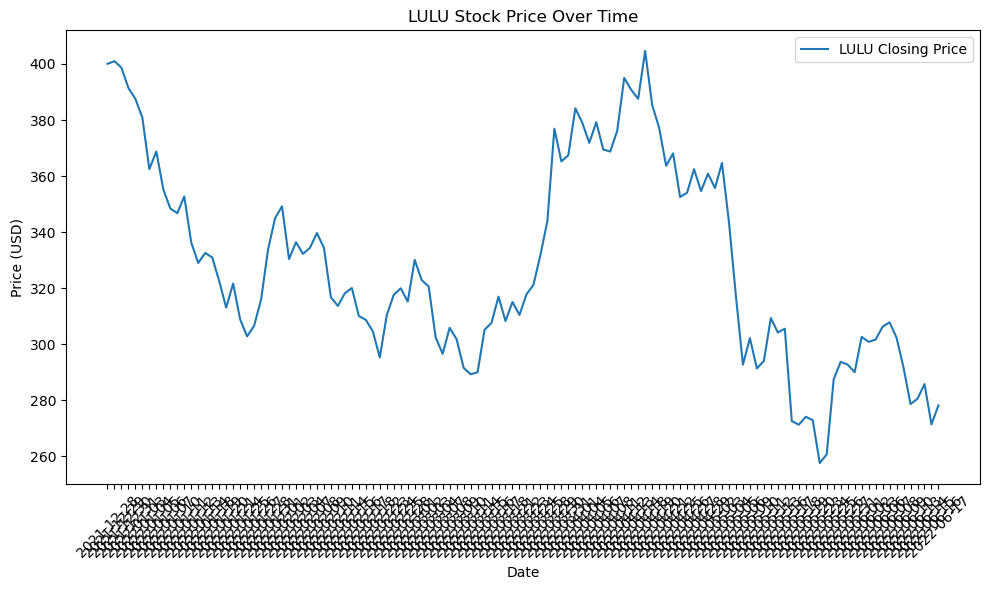

In [41]:
# STOCK DATA
ticker = "LULU"

# api_url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/2014-01-01/2023-12-01?adjusted=true&sort=asc&limit=120&apiKey=s3nEpo1Ar6jYpz1NE1HF5xeff7HBikJK"
# URL and API key (Note: Using the provided API key)
url = api_url

# Performing the GET request
response = requests.get(url)
data = response.json()

# Extracting the necessary information
dates = [item["t"] for item in data["results"]]
closing_prices = [item["c"] for item in data["results"]]

# Converting timestamp to readable date format
from datetime import datetime
dates = [datetime.fromtimestamp(date/1000).strftime('%Y-%m-%d') for date in dates]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label=f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{ticker} Stock Price Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

results = data['results']

# Creating a DataFrame
lulu_df = pd.DataFrame(results)

# Selecting only the timestamp ('t') and closing price ('c') columns
lulu_df = lulu_df[['t', 'c']]

# Converting timestamp to a readable format
lulu_df['t'] = pd.to_datetime(lulu_df['t'], unit='ms').dt.date

lulu_df = lulu_df.rename(columns={'t': 'ds', 'c': 'y'})
lulu_df.dropna()

lulu_df.head()  # Displaying the DataFrame

In [ ]:

m = Prophet()
m.fit(lulu_df)

In [ ]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


In [ ]:
forecast = m.predict(future)
display(forecast.head(10))


In [ ]:
m.plot(forecast)

In [ ]:
lulu_lemon_df

In [ ]:
#lulu_lemon_df = lulu_lemon_df.drop(0)
#

In [ ]:
lulu_lemon_df

In [29]:
# running_shorts_df = running_shorts_df.drop(0)
# running_shorts_df
# tennis_skirt_df = tennis_skirt_df.drop(0)
# lulu_lemon_df = lulu_lemon_df.drop(0)
# tennis_skirt_df.reset_index(drop = True, inplace=True)
# tennis_skirt_df = tennis_skirt_df.drop(0)
# lulu_lemon_df = lulu_lemon_df.drop(0)
# running_shorts_df = running_shorts_df.rename(columns={'ds': 'Month'})


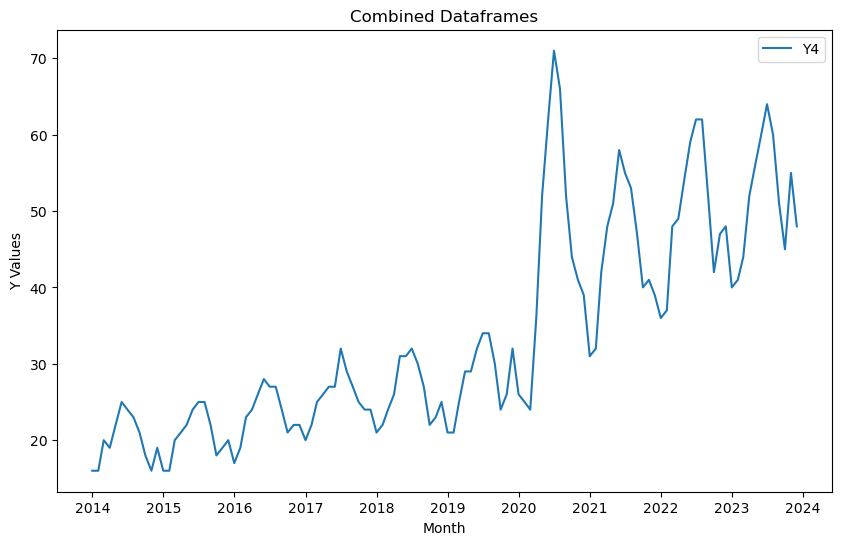

In [33]:
df1 = running_shorts_df 
df2 = tennis_skirt_df
df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

merged_df['Running Shorts'] = pd.to_numeric(merged_df['Running Shorts'], errors='coerce')
merged_df['Tennis Skirts'] = pd.to_numeric(merged_df['Tennis Skirts'], errors='coerce')
merged_df['lululemon Sales'] = pd.to_numeric(merged_df['lululemon Sales'], errors='coerce')

# Convert 'Date' column to datetime
merged_df['Month'] = pd.to_datetime(merged_df['Month'])
merged_df['Y4'] = ((merged_df['Running Shorts'] + merged_df['Tennis Skirts'] + merged_df['lululemon Sales']) / 3).astype(int)

# Plot the data
plt.figure(figsize=(10, 6))

# plt.plot(merged_df['Month'], merged_df['Running Shorts'], label='Y1')
# plt.plot(merged_df['Month'], merged_df['Tennis Skirts'], label='Y2')
# plt.plot(merged_df['Month'], merged_df['lululemon Sales'], label='Y3')
# df_home_sales[["inventory", "homes_sold"]].corr()

# Plot the average
plt.plot(merged_df['Month'], merged_df['Y4'], label='Y4')

plt.xlabel('Month')
plt.ylabel('Y Values')
plt.title('Combined Dataframes')
merged_df.head()
plt.legend()
#plt.show()

In [34]:
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4
0,2014-01-01,19,8,23,16
1,2014-02-01,22,8,20,16
2,2014-03-01,29,10,22,20
3,2014-04-01,31,8,20,19
4,2014-05-01,38,10,18,22
...,...,...,...,...,...
115,2023-08-01,56,63,63,60
116,2023-09-01,42,55,57,51
117,2023-10-01,33,42,61,45
118,2023-11-01,34,32,100,55


In [36]:
stock_and_google_trends_df = merged_df

In [74]:
# Stock
ticker = "NKE"

api_url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/week/2014-01-01/2023-12-01?adjusted=true&sort=asc&limit=10000&apiKey=s3nEpo1Ar6jYpz1NE1HF5xeff7HBikJK"
# URL and API key (Note: Using the provided API key)
url = api_url

# Performing the GET request
response = requests.get(url)
data = response.json()

# Extracting the necessary information
dates = [item["t"] for item in data["results"]]
closing_prices = [item["c"] for item in data["results"]]

# Converting timestamp to readable date format
from datetime import datetime
dates = [datetime.fromtimestamp(date/1000).strftime('%Y-%m-%d') for date in dates]
data

{'ticker': 'NKE',
 'queryCount': 487,
 'resultsCount': 101,
 'adjusted': True,
 'results': [{'v': 15680575.0,
   'vw': 167.5803,
   'o': 166.52,
   'c': 166.67,
   'h': 170.12,
   'l': 165.48,
   't': 1640494800000,
   'n': 238194},
  {'v': 26009737.0,
   'vw': 162.9522,
   'o': 167.53,
   'c': 156.97,
   'h': 167.91,
   'l': 156.86,
   't': 1641099600000,
   'n': 348897},
  {'v': 35979050.0,
   'vw': 150.055,
   'o': 150.52,
   'c': 148.18,
   'h': 153.6,
   'l': 146.8538,
   't': 1641704400000,
   'n': 469498},
  {'v': 24675316.0,
   'vw': 145.649,
   'o': 148.06,
   'c': 142.95,
   'h': 149.1,
   'l': 142.5,
   't': 1642309200000,
   'n': 358538},
  {'v': 37924785.0,
   'vw': 144.4151,
   'o': 140.81,
   'c': 145.91,
   'h': 148.97,
   'l': 139.56,
   't': 1642914000000,
   'n': 515474},
  {'v': 28672542.0,
   'vw': 147.2006,
   'o': 146.27,
   'c': 145.39,
   'h': 149.68,
   'l': 143.64,
   't': 1643518800000,
   'n': 354749},
  {'v': 26111013.0,
   'vw': 144.1241,
   'o': 145.3,
 

In [71]:
results = data['results']

# Creating a DataFrame
lulu_df = pd.DataFrame(results)

# Selecting only the timestamp ('t') and closing price ('c') columns
lulu_df = lulu_df[['t', 'c']]

# Converting timestamp to a readable format
lulu_df['t'] = pd.to_datetime(lulu_df['t'], unit='ms').dt.date

lulu_df = lulu_df.rename(columns={'t': 'Month', 'c': 'Stock Price'})
lulu_df.dropna()

lulu_df.head()  # Displaying the DataFrame

,Month,Stock Price
0,2021-12-01,166.67
1,2022-01-01,148.07
2,2022-02-01,136.55
3,2022-03-01,134.56
4,2022-04-01,124.70


In [72]:
lulu_df['Month'] = pd.to_datetime(lulu_df['Month'])
stock_and_google_trends_df = pd.merge(merged_df, lulu_df, on='Month')
stock_and_google_trends_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Stock Price
0,2021-12-01,28,27,62,39,166.67
1,2022-01-01,26,32,50,36,148.07
2,2022-02-01,31,37,45,37,136.55
3,2022-03-01,41,57,47,48,134.56
4,2022-04-01,46,55,47,49,124.70
5,2022-05-01,50,64,48,54,118.85
6,2022-06-01,56,67,56,59,102.20
7,2022-07-01,59,65,62,62,114.92
8,2022-08-01,54,68,64,62,106.45
9,2022-09-01,41,59,58,52,83.12


In [66]:
# Calculate percentage change for 'Stock Price'
stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Stock Price'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Y4 % Change'] = stock_and_google_trends_df['Y4'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Stock Price,Stock Price % Change,Y4 % Change
1,2022-01-01,26,32,50,36,148.07,-11.159777,-7.692308
2,2022-02-01,31,37,45,37,136.55,-7.780104,2.777778
3,2022-03-01,41,57,47,48,134.56,-1.457342,29.729730
4,2022-04-01,46,55,47,49,124.70,-7.327586,2.083333
5,2022-05-01,50,64,48,54,118.85,-4.691259,10.204082
6,2022-06-01,56,67,56,59,102.20,-14.009255,9.259259
7,2022-07-01,59,65,62,62,114.92,12.446184,5.084746
8,2022-08-01,54,68,64,62,106.45,-7.370345,0.000000
9,2022-09-01,41,59,58,52,83.12,-21.916393,-16.129032
10,2022-10-01,28,44,56,42,92.68,11.501444,-19.230769


In [67]:
stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].corr()

,Y4 % Change,Stock Price % Change
Y4 % Change,1.00000,0.12317
Stock Price % Change,0.12317,1.00000


In [73]:
stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].plot()

KeyError: "None of [Index(['Y4 % Change', 'Stock Price % Change'], dtype='object')] are in the [columns]"

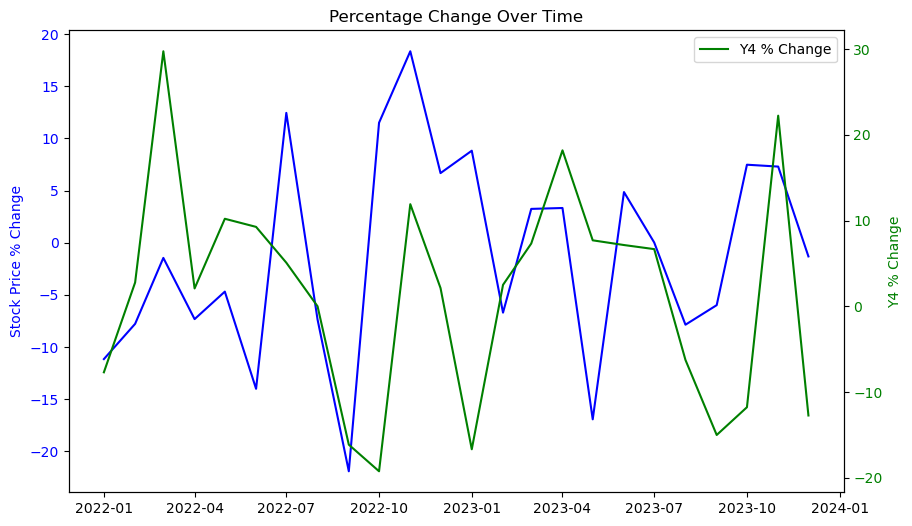

In [69]:
import matplotlib.pyplot as plt

# Assuming stock_and_google_trends_df is your dataframe
# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting Stock Price % Change on the left y-axis
plt.plot(stock_and_google_trends_df['Month'], stock_and_google_trends_df['Stock Price % Change'], label='Stock Price % Change', color='blue')
plt.ylabel('Stock Price % Change', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a twin axis for Y4 % Change
ax2 = plt.twinx()
ax2.plot(stock_and_google_trends_df['Month'], stock_and_google_trends_df['Y4 % Change'], label='Y4 % Change', color='green')
ax2.set_ylabel('Y4 % Change', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X-axis label and title
plt.xlabel('Month')
plt.title('Percentage Change Over Time')

# Display the legend
plt.legend()

# Show the plot
plt.show()